In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data_list=[]
file_names=['2006-05-13.csv','2006-05-14.csv','2006-05-15.csv','2006-05-16.csv','2006-05-17.csv',
            '2006-05-18.csv','2006-05-19.csv','2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']

for f in file_names:
    data=pd.read_csv('data/raw_data/'+f)
    data = data.drop(['SJX08','SJX13'],axis=1)
    if f in ['2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']:
        q25,q75=np.quantile(data['SJS13'],[0.25,0.75])
        print(q25-1.5*(q75-q25),q75+1.5*(q75-q25))
        data['SJS13'][data['SJS13']<q25-1.5*(q75-q25)]=np.nan#3000
        data['SJS13'][data['SJS13']>q75+1.5*(q75-q25)]=np.nan#2700
    data=data.interpolate(method='linear')
    data=data.iloc[90:-90]
    print(data.shape)
    data_list.append(data)

(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
2774.862492801036 2860.8972732559014
(172620, 12)
2785.931150398128 2869.0900732652844
(172620, 12)
2732.015028449452 2869.1944270294844
(172620, 12)


In [11]:
datas = data_list.copy()
for i, data in enumerate(datas):
    #data = data.rolling(window=window).mean()
    #data = data.dropna()
    data = data.values
    data = np.transpose(data)
    datas[i] = data
cable_data = datas
data = cable_data[0][0]

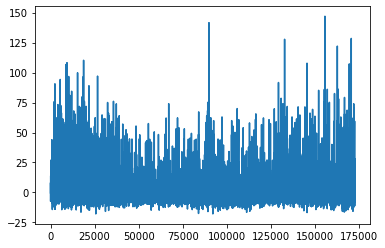

In [13]:
from scipy.signal import detrend

detrend = detrend(data)
plt.plot(detrend)

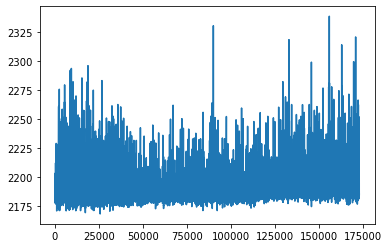

In [14]:
plt.plot(data)

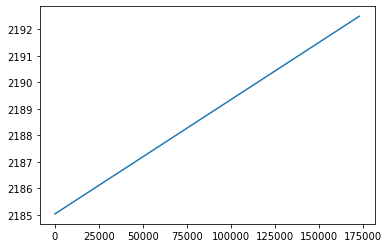

In [16]:
plt.plot(data - detrend)

In [31]:
def to_rolling(data_list, window):
    datas = data_list.copy()
    for i, data in enumerate(datas):
        data = data.rolling(window=window).mean()
        data = data.dropna()
        data = data.values
        data = np.transpose(data)
        datas[i] = data
    cable_data = datas
    
    datas = data_list.copy()
    for i, data in enumerate(datas):
        data = data.values
        data = np.transpose(data)
        datas[i] = data
    cable_data2 = datas
    
    rolling_list = []
    for i in range(10):
        rolling_list.append([])
        for j in range(12):
            rolling_list[i].append(np.array(cable_data2[i][j][window-1:])-cable_data[i][j])
            
    return np.array(rolling_list)

In [35]:
cable_data = to_rolling(data_list, 7200)

In [36]:
file_names=['2006-05-13','2006-05-14','2006-05-15','2006-05-16','2006-05-17', '2006-05-18','2006-05-19','2007-12-14','2009-05-05','2011-11-01']
cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14", "SJX09", "SJX10", "SJX11", "SJX12", "SJX14"]

In [37]:
for i in range(len(cable_data)):
    df = pd.DataFrame(np.transpose(cable_data[i]), columns=cable_title)
    df.to_csv('data/rolling_data/1시간/' + file_names[i] + '.csv')

In [38]:
cable_data = to_rolling(data_list, 3600)

In [39]:
for i in range(len(cable_data)):
    df = pd.DataFrame(np.transpose(cable_data[i]), columns=cable_title)
    df.to_csv('data/rolling_data/30분/' + file_names[i] + '.csv')

In [40]:
cable_data = to_rolling(data_list, 1200)

In [41]:
for i in range(len(cable_data)):
    df = pd.DataFrame(np.transpose(cable_data[i]), columns=cable_title)
    df.to_csv('data/rolling_data/10분/' + file_names[i] + '.csv')